# FOrmualtion and solving of the optimization problem

In [5]:
import numpy as np
from scipy.optimize import minimize

def euclidean_distance(p1, p2):
    return np.linalg.norm(p2 - p1)

def objective_mindist(coordinates):
    distances = []
    for i in range(N):
        for j in range(i + 1, N):
            distances.append(euclidean_distance(coordinates[i], coordinates[j]))
    return -min(distances)

def objective_logsum(coordinates):
    result = np.infty
    sum = 0 
    for i in range(N):
        for j in range(N):
            if i!=j:
                sum += np.exp(
                    -betta * euclidean_distance(coordinates[i], coordinates[j])            
                    )
                
    result = -np.log(sum)/betta
    return -result

def constraint_sum_to_one(coordinates):
    # print(np.sum(coordinates, axis=0)/N - 1)
    return np.sum(coordinates, axis=0)/N - 1

def constraint_sum_to_one_vector(coordinates):
    A = np.kron(np.identity(N),np.ones((1,3)))
    return np.dot(A, coordinates)-1

# Betta factor of log-sum-exponential function (Monteiro, 2014)
betta = 4

N = 4  # Number of points

# Initial guess for coordinates
# initial_guess = np.ones((N, 3)) / 3
initial_guess = np.random.rand(N,3)
# initial_guess = np.array(
#    [[0.99, 0.01, 0.01], [0.01, 0.99, 0.01], [0.01, 0.01, 0.99], [1/3, 1/3, 1/3]]
#    )

# Constraints
constraints = [
    {'type': 'eq', 'fun': constraint_sum_to_one_vector},
    {'type': 'ineq', 'fun': lambda x: x}
]

# Bounds for each variable (xi, yi, zi > 0)
bounds = [(0, None), (0, None), (0, None)] * N

# Solve the optimization problem
result = minimize(
    objective_logsum, 
    initial_guess.flatten(), 
    method='SLSQP', 
    bounds=bounds, 
    constraints=constraints
    )

# Reshape the result to get the optimal coordinates
optimal_coordinates = result.x.reshape(N, 3)

# Print the optimal coordinates and the optimal value
print("Initial Guess")
print(initial_guess)
print("Optimal Coordinates:")
print(optimal_coordinates)
print("Optimal Minimum Pairwise Distance:", result.fun)


Initial Guess
[[0.19699225 0.89547547 0.7862691 ]
 [0.11355179 0.93862371 0.36936552]
 [0.0606613  0.96539575 0.33080273]
 [0.4876223  0.12981115 0.52024951]]
Optimal Coordinates:
[[0.87138401 0.12861599 0.        ]
 [0.55853331 0.27461145 0.16685524]
 [0.00593475 0.81432913 0.17973612]
 [0.44172798 0.08391683 0.47435519]]
Optimal Minimum Pairwise Distance: 0.2294763746885105


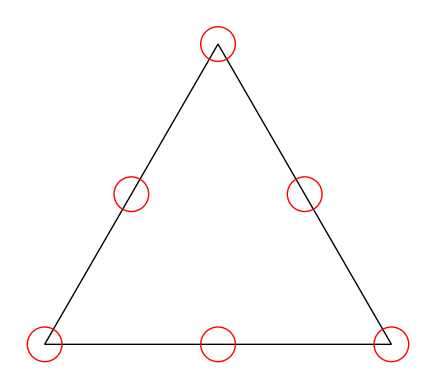

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the equilateral triangle's vertices
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the equilateral triangle
triangle = plt.Polygon(vertices, closed=True, fill=None, edgecolor='black')
ax.add_patch(triangle)

# Define the radius of the circles
radius = 0.05  # Adjust the radius as needed

# Calculate the positions of circles on the edges
edge_centers = [(vertices[i] + vertices[(i + 1) % 3]) / 2 for i in range(3)]

# Plot circles at the vertices and on the edges
for center in np.vstack([vertices, edge_centers]):
    circle = plt.Circle(center, radius, fill=None, edgecolor='red')
    ax.add_patch(circle)

# Set axis limits and aspect ratio
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, np.sqrt(3)/2 + 0.1)
ax.set_aspect('equal', adjustable='box')

# Show the plot
# plt.axis('off')  # Turn off the axis
plt.show()
